Question 1: What is Simple Linear Regression?

In [ ]:
'''
Simple Linear Regression is a method used to establish the strenght and characteristic of the relationship between one independent variable and one dependent variable.
for example you want to predict the price of the house using the area of the house.
Here price is the dependent variable (y) and area of the house is dependent variable (X).
simple means there is only one variable.
linear means the relationship is linear.
regresssion means to establish the relationship
'''


Question 2: What are the key assumptions of Simple Linear Regression?

In [ ]:
'''
There are in total of 5 assumptios of the simple linear regression.
1.linearity: The dependent variable and the independent variable must have a linear relationship
2.Independence: The observation should have no relation(rows are independent of each other)
3.Homoscedasticity: There should be constant variation in error or they should not show any pattern.
4.Multicollinearity: The independent variable should not be highly correlated (but in simple linear regression since there is only one varibale then this is not the problem)
5.Normality: The error should be normally distributed.
'''

Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

In [ ]:
'''
Hetroscedasticity means when the error show some variance across all levels of independent variable.
Since it voilates the homoscedasticty assumption of the linear regression hence it is a problem and must be dealt with other wise it can create following issues:
The coefficients are still correct on average (unbiased)but standard errors, p-values, and confidence intervals are wrong.
This makes the inference and decision-making unreliable.
'''

Question 4: What is Multiple Linear Regression?

In [ ]:
'''
Multiple linear regression is the method that establsihes the relationship between the dependent variable (y) and more than one independent varibale(X1,X2,X3......Xn).
'''

Question 5: What is polynomial regression, and how does it differ from linear
regression?

In [ ]:
'''
Polynomial Regression is a type of regression analysis where the relationship between the independent variable(s) 𝑋 and the dependent variable 𝑌
is modeled as an nth-degree polynomial.
it captures curved or non linear relationship
'''

Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)   # reshaped for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])


In [31]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [32]:
Y

array([ 2.1,  4.3,  6.1,  7.9, 10.2])

In [33]:
model = LinearRegression()
model.fit(X, Y)



LinearRegression()

In [34]:
# Predictions
Y_pred = model.predict(X)

In [35]:
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


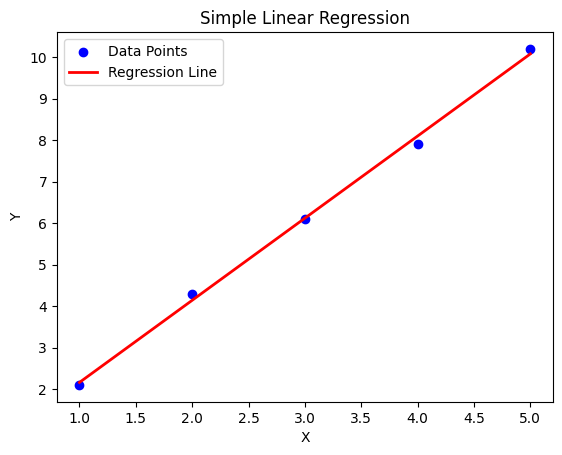

In [28]:
# Plot data and regression line
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.


In [36]:
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

In [37]:
df= pd.DataFrame({'Area':Area,'Rooms':Rooms,'Price':Price})

In [38]:
df

,Area,Rooms,Price
0,1200,2,250000
1,1500,3,300000
2,1800,3,320000
3,2000,4,370000


In [53]:
y=df['Price']

In [54]:
y

,Price
0,250000
1,300000
2,320000
3,370000


In [55]:
X=df.drop('Price',axis=1)

In [56]:
X

,Area,Rooms
0,1200,2
1,1500,3
2,1800,3
3,2000,4


In [57]:
#we want to predict the price which is dependent variable and the independent variable is rooms and area
corr=X.corr()

In [58]:
corr

,Area,Rooms
Area,1.000000,0.933139
Rooms,0.933139,1.000000


<Figure size 100x100 with 0 Axes>

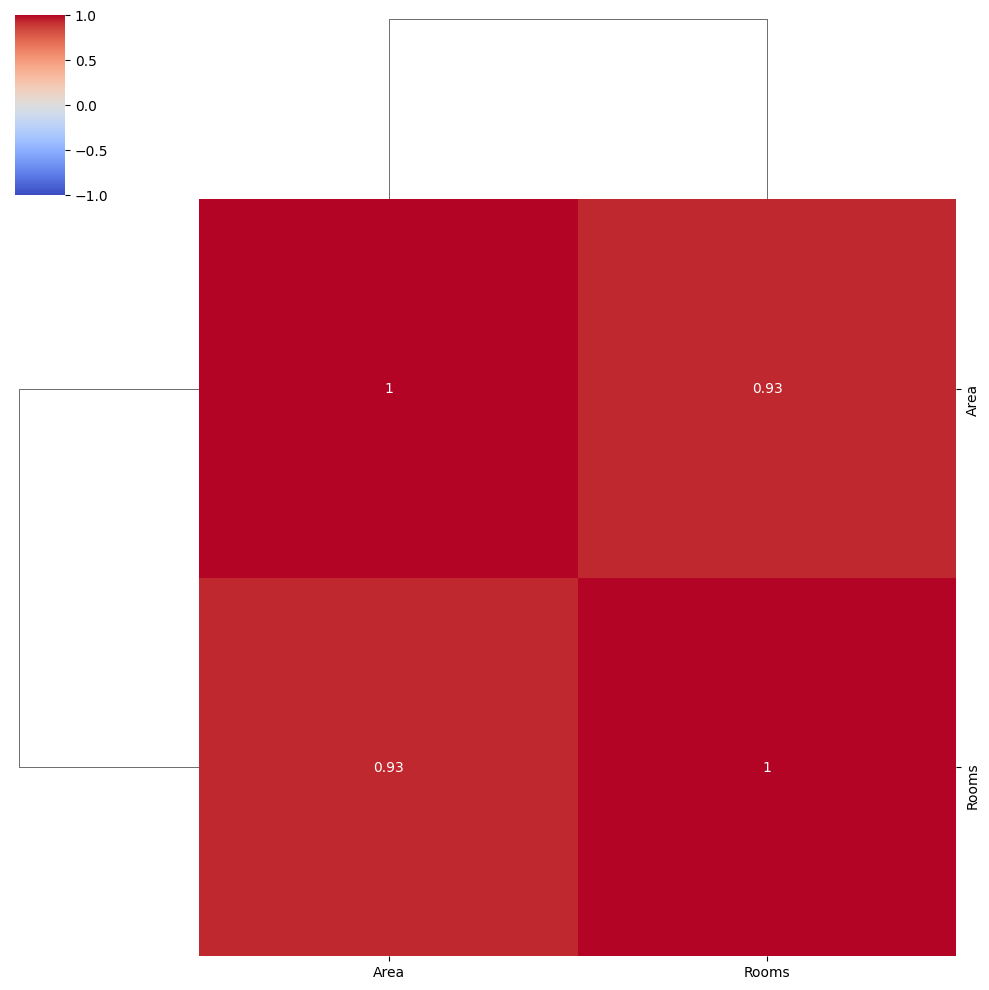

In [49]:
plt.figure(figsize=(1,1))
sns.clustermap(corr,cmap='coolwarm',annot=True,vmin=-1,vmax=1)
plt.show()

In [50]:
#we have noticed high correaltion between the area and rooms hecne the multicollinearity is present
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif['feature'] = X.columns

In [63]:
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [64]:
display(vif)

,feature,VIF
0,Area,127.796923
1,Rooms,127.796923


In [ ]:
#here we see high multicollinearity between the rooms and area
#so we can remove either one of the columns and then predict the price based on the other column

In [65]:
y

,Price
0,250000
1,300000
2,320000
3,370000


In [66]:
X

,Area,Rooms
0,1200,2
1,1500,3
2,1800,3
3,2000,4


In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
model=LinearRegression()

In [70]:
model.fit(X,y)

LinearRegression()

In [71]:
model.coef_
print(f'The coefficients are {model.coef_}')

The coefficients are [   63.15789474 34736.84210526]


In [72]:
model.intercept_
print(f'The intercept is {model.intercept_}')

The intercept is 103157.89473684214


In [ ]:
'''
Interpretation of coeffiencents:-
1. The price of the house changes by 63.15789474 unit when there is 1 unit change in the area of the house keeping other variable constant.
2. The price of the house changes by 34736.84210526 unit when there is 1 unit change in the rooms keeping the variable constant
Interpretation of intercept:-
1. The price of the house on an avergae is 103157.89473684214 when the all variabels are zero, but in real life scene teh price can not be any value if there is no area.
'''

Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5] ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

In [74]:
X = [1, 2, 3, 4, 5]
Y = [2.2, 4.8, 7.5, 11.2, 14.7]

In [75]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])


In [76]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [79]:
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

In [80]:
X_range = np.linspace(1, 5, 100).reshape(-1, 1)   # smooth curve
Y_pred = model.predict(poly.transform(X_range))

In [81]:
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_)
print(f"Equation: Y = {model.intercept_:.2f} + {model.coef_[1]:.2f}X + {model.coef_[2]:.2f}X²")


Intercept (β0): 0.06000000000000938
Coefficients (β1, β2): [0.   1.94 0.2 ]
Equation: Y = 0.06 + 1.94X + 0.20X²


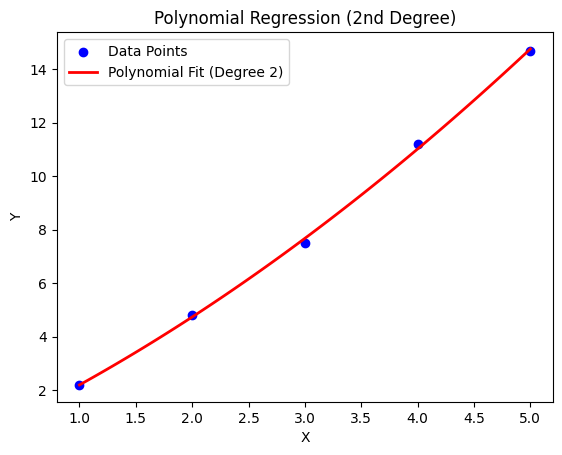

In [82]:
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X_range, Y_pred, color="red", linewidth=2, label="Polynomial Fit (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (2nd Degree)")
plt.legend()
plt.show()

Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals

In [83]:
X = [10, 20, 30, 40, 50]
Y = [15, 35, 40, 50, 65]

In [84]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)

In [85]:
X

array([[10],
       [20],
       [30],
       [40],
       [50]])

In [86]:
Y = np.array([15, 35, 40, 50, 65])

In [87]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [88]:
Y_pred = model.predict(X)

In [89]:
residuals = Y - Y_pred


In [91]:
residuals

array([-3. ,  5.5, -1. , -2.5,  1. ])

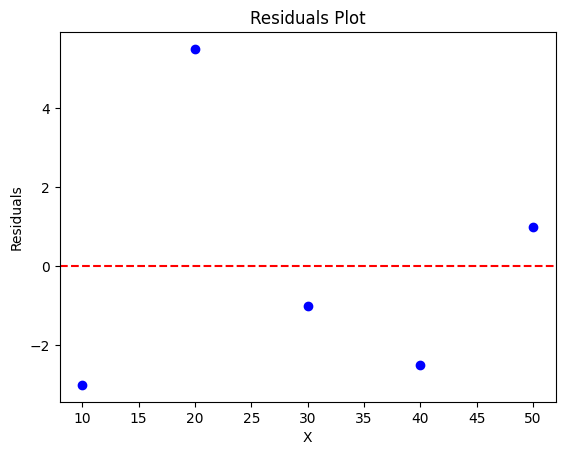

In [92]:
plt.scatter(X, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")  # zero line
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


In [ ]:
'''
Detection of Multicollinearity
While predicting the price of the house if i encounter multicollinearity in my model with feature number of rooms , area and location
the interpreation of the model becomes tough which feature is contributiong more to price it will be be tough as change in area is leading change
in no of rooms and hence change in price.
it also incerases the overfitting of the model, the pattern will be memorised and that will lead to overfitting .
The basic step to treat multicollinearity is :-
1.Vif method:- variation inflation factor if we notice vif >10 then we can drop that feature one by one
2.If there are almost many features then vif will take time hence there is another method for it that is Recusrive feature Elimination.
We can also use Regularization methods:
Ridge Regression (L2 penalty):- it will shrink coefficients of correlated predictors.
Lasso Regression (L1 penalty):- it can eliminate redundant predictors by setting coefficients to zero.

Detection of hetroscedasticity
Detect: Residual plots, Breusch–Pagan test, or White’s test.
Possible solutions:
Transform the dependent variable (e.g., log(Price), sqrt(Price)) to stabilize variance.
Use Weighted Least Squares (WLS): give less weight to data points with higher variance.
Use Robust Standard Errors (Huber-White, HAC): ensures inference (p-values, confidence intervals) remains valid even with heteroscedasticity.
'''